# Import stuff

In [2]:
import os
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd

# Parameters

In [12]:
#dirs:
pre_proc_dir = 'data/pre_proc_data'
masks_dir = 'masks'
connectiviity_data_dir = 'connectivity_data'

# file_format:
any_session_file_format = '_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz'

# R01 to IDCH mapping:
mapping_R01_to_IDCH = {'222': '101', '183': '102', '216': '103', '192': '104', '251': '105', '206': '106', '180': '107', '184': '108', '169': '109', '207': '110', '115': '112', '114': '113', '232': '114'}

# masks: * mask files should end with _mask.nii
masks_to_apply = ['bilateral_putamen_mask.nii.gz', 'bilateral_SMA_mask.nii.gz']

# regions to test connectivity between: * add pairs of regions to test connectivity between
connectivity_regions = [['bilateral_putamen', 'bilateral_SMA'],]


# Create IDCH sub id folders + Extract time series using masks (directly from the data) for each session separately

In [3]:
# get all directories in the root directory
r01_sub_dirs = os.listdir(pre_proc_dir)
r01_sub_dirs = [x for x in r01_sub_dirs if 'MBMFHab' in x]

for dir in r01_sub_dirs:
    sub_dir = os.path.join(pre_proc_dir, dir, 'func')
    
    # get sub R01 id:
    sub_R01_id = dir.split('Hab0')[1][:3]
    # get sub IDCH id:
    sub_IDCH_id = mapping_R01_to_IDCH[sub_R01_id]

    # create a new foler for the sub according to sub_IDCH_id:
    sub_IDCH_dir = os.path.join('sub-' + sub_IDCH_id)
    if not os.path.exists(sub_IDCH_dir):
        os.makedirs(sub_IDCH_dir)

    for mask in masks_to_apply:
        mask_name = mask.split('_mask')[0]
        for session in ['1', '2']:
            input_file = [f for f in os.listdir(sub_dir) if f'{session}{any_session_file_format}' in f][0]
            if not os.path.exists(os.path.join(sub_IDCH_dir, f"sub-{sub_IDCH_id}_IDCH_ses-{session}_{mask_name}_time_series.txt")):
                print(f'>> Extracting time series for sub-{sub_IDCH_id}, session {session}, using {mask}')
                # fslmeants -i <input_file> -o <output_file> -m <mask_file>
                os.system(f'fslmeants -i {os.path.join(sub_dir, input_file)} -o {os.path.join(sub_IDCH_dir, f"sub-{sub_IDCH_id}_IDCH_ses-{session}_{mask_name}_time_series.txt")} -m {os.path.join(masks_dir, mask)}')


# Calculate correlations (connectivity) and plot each subject's timeseries data

Analyzing connectivity between bilateral_putamen and bilateral_SMA
Analyzing subject 101
>> Subject 101: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.7374462004051943, p=5.306947850423156e-104, z-score=0.9448578006472537
 - session 2: r=0.7776795248652417, p=1.1890010757831553e-122, z-score=1.039472116248541


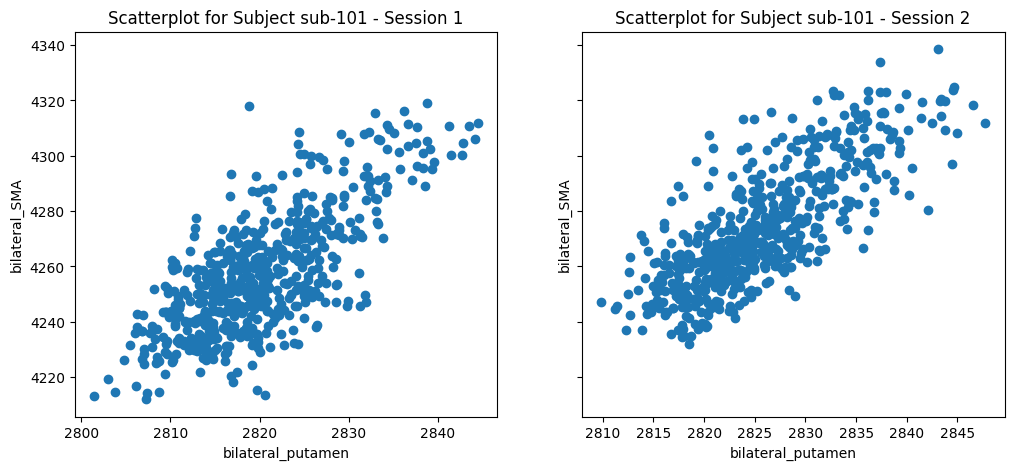

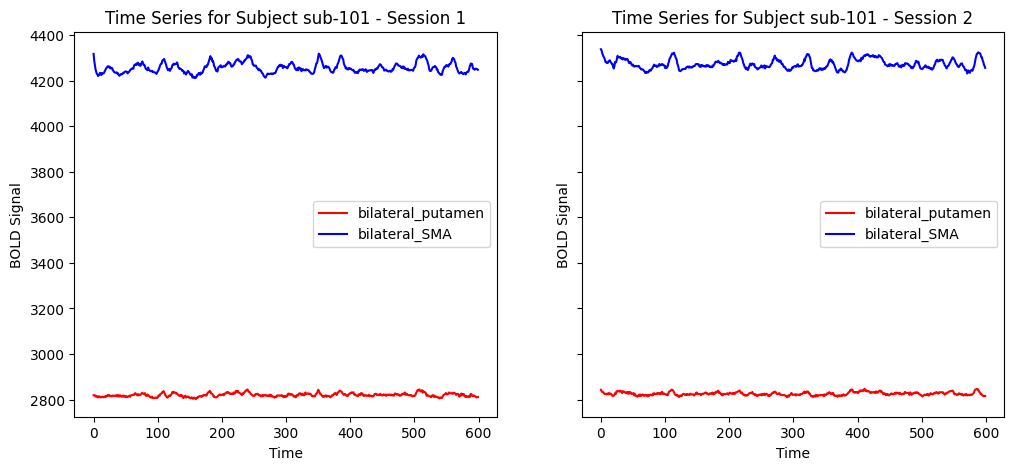

Analyzing subject 102
>> Subject 102: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.7219917305103969, p=1.001745622502259e-97, z-score=0.9117930115518366
 - session 2: r=0.7611829224916202, p=1.4739361524604956e-114, z-score=0.9990215422502243


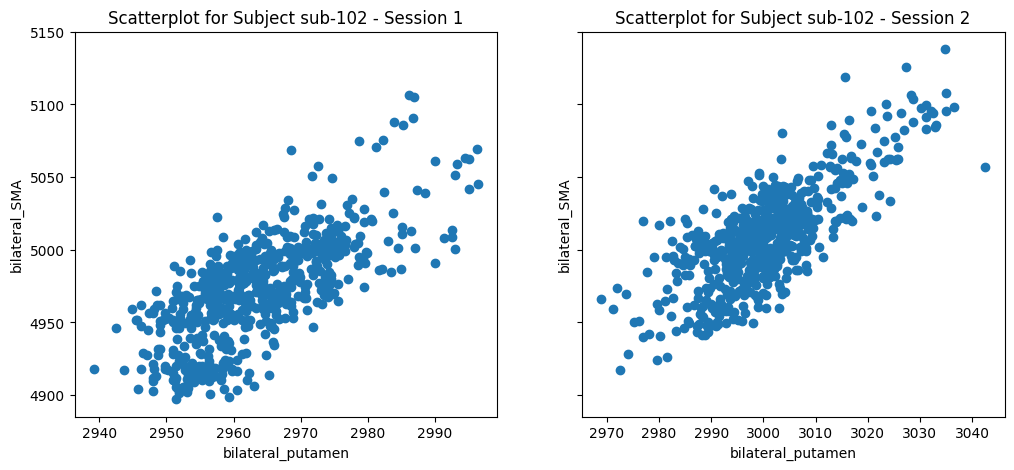

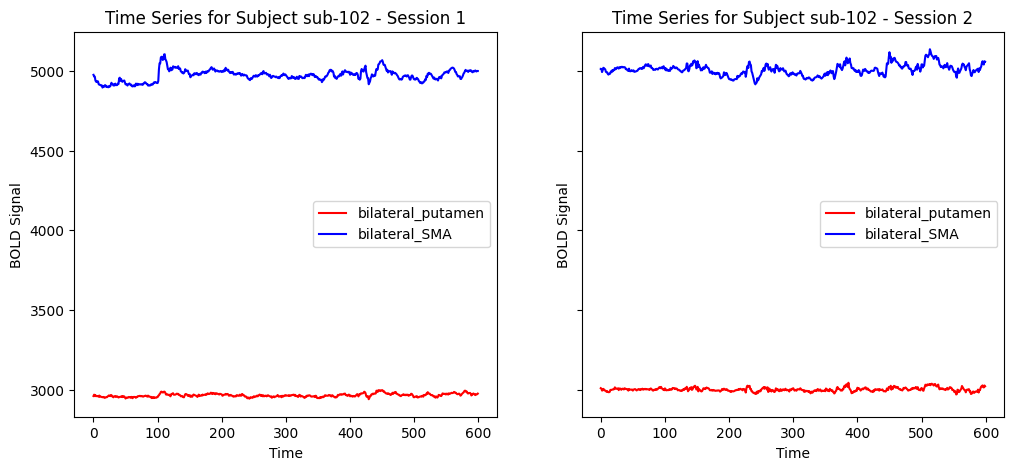

Analyzing subject 103
>> Subject 103: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.7967828047094639, p=6.109523833940263e-133, z-score=1.0897388396845549
 - session 2: r=0.7017356072054981, p=4.064871097537655e-90, z-score=0.8707118186758268


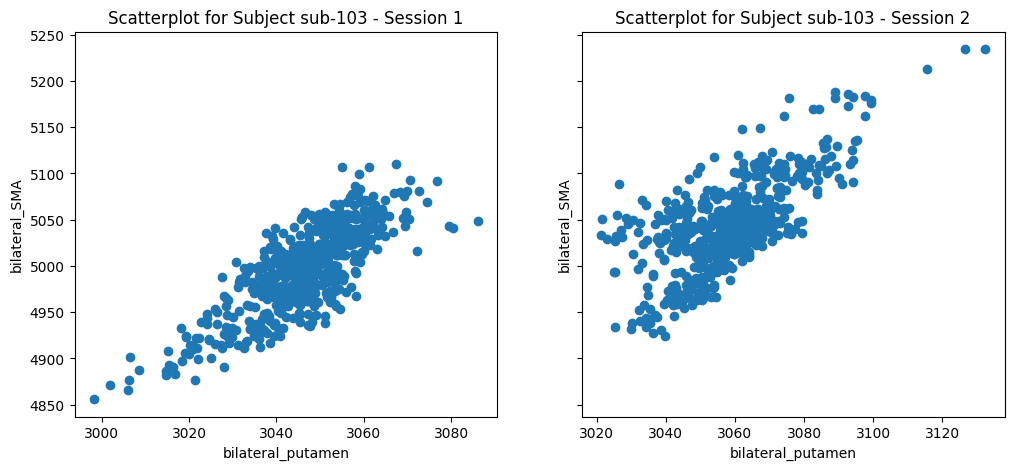

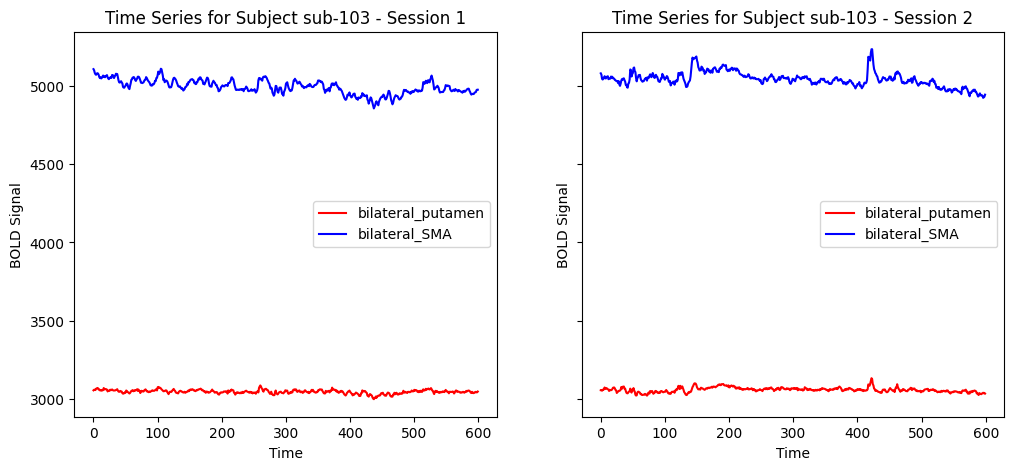

Analyzing subject 104
>> Subject 104: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.6299522774579549, p=1.1544145172733003e-67, z-score=0.7413370192873014
 - session 2: r=0.5257984310589997, p=5.878945778358345e-44, z-score=0.5843203155746732


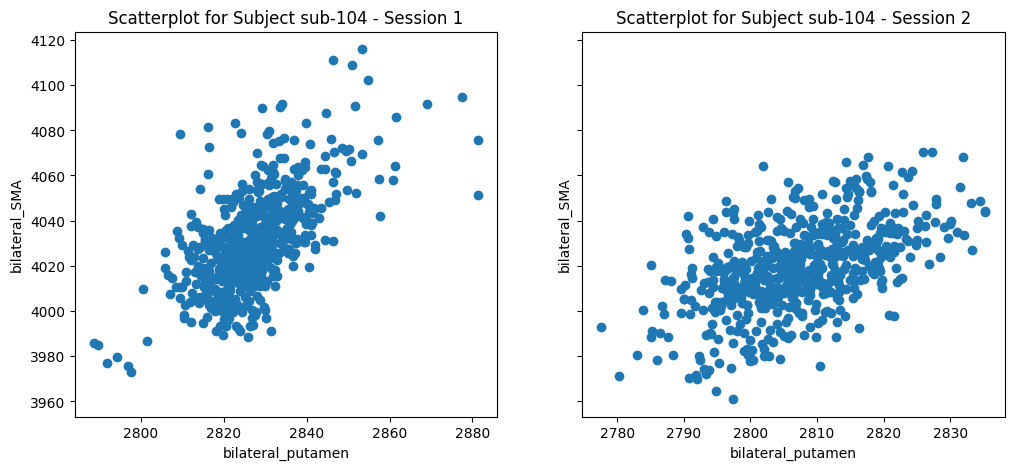

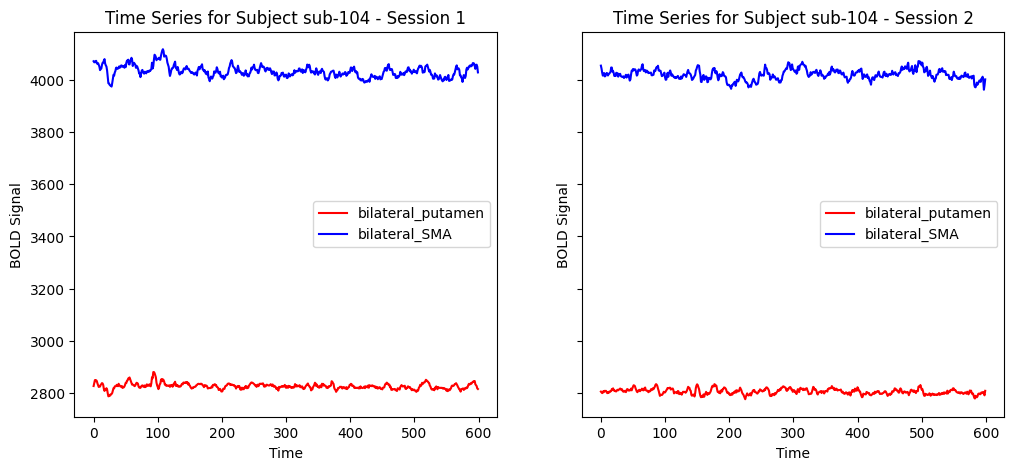

Analyzing subject 105
>> Subject 105: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.29578237032966836, p=1.4016415478194647e-13, z-score=0.30489124862116473
 - session 2: r=0.318669124237307, p=1.254764280877479e-15, z-score=0.33016510605206884


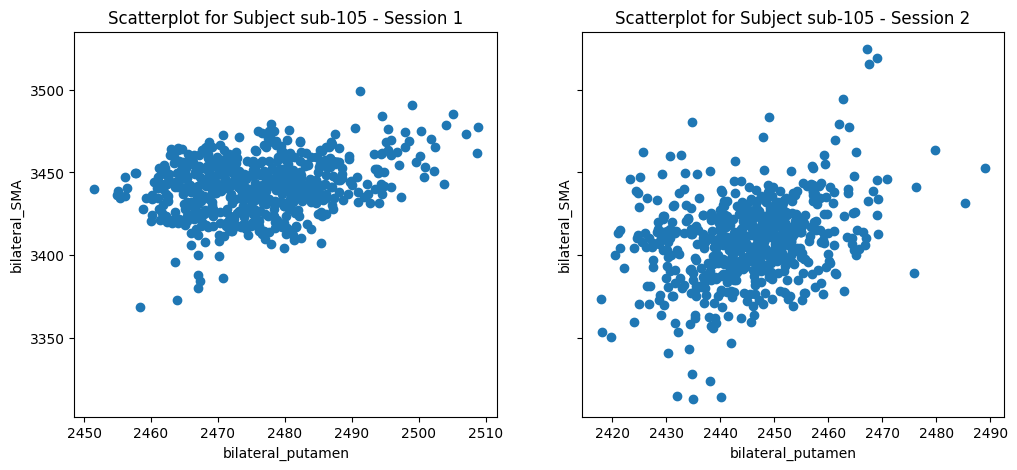

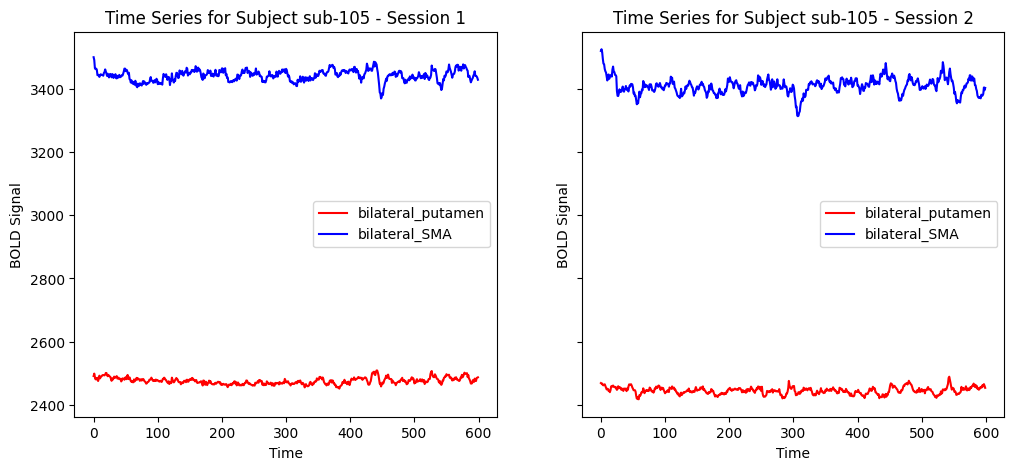

Analyzing subject 106
>> Subject 106: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.513348173105683, p=1.205044864565442e-41, z-score=0.5672654377248629
 - session 2: r=0.6829603754370761, p=1.2800638104484369e-83, z-score=0.8346414426101679


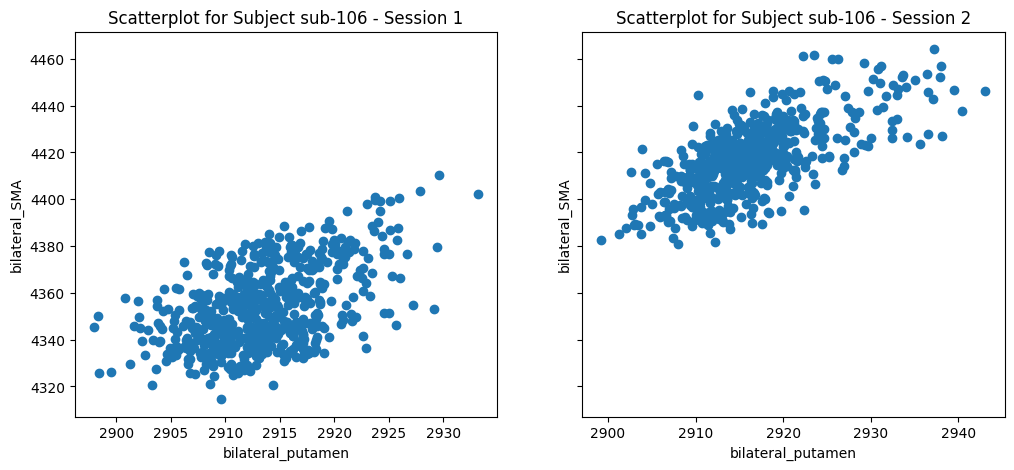

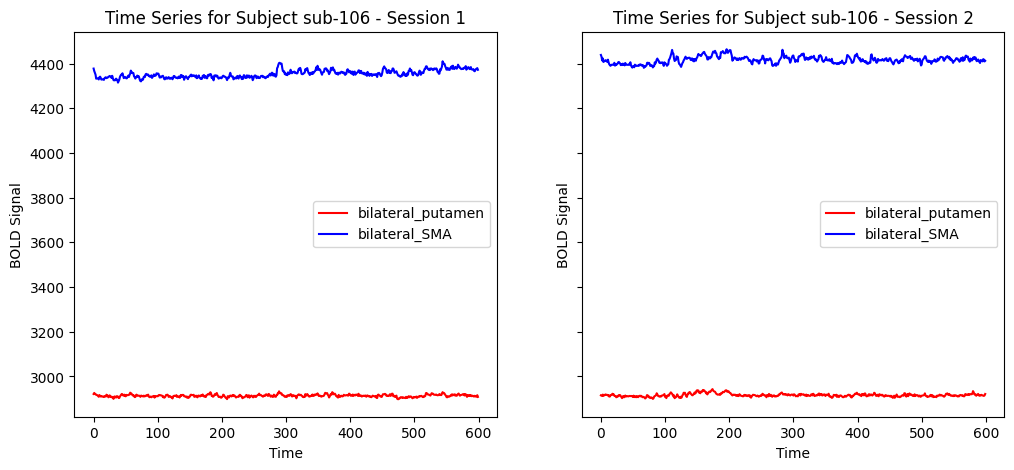

Analyzing subject 107
>> Subject 107: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.7693841870697322, p=1.6959898205211917e-118, z-score=1.018816834826184
 - session 2: r=0.7224803871156125, p=6.439668088907743e-98, z-score=0.9128145043916149


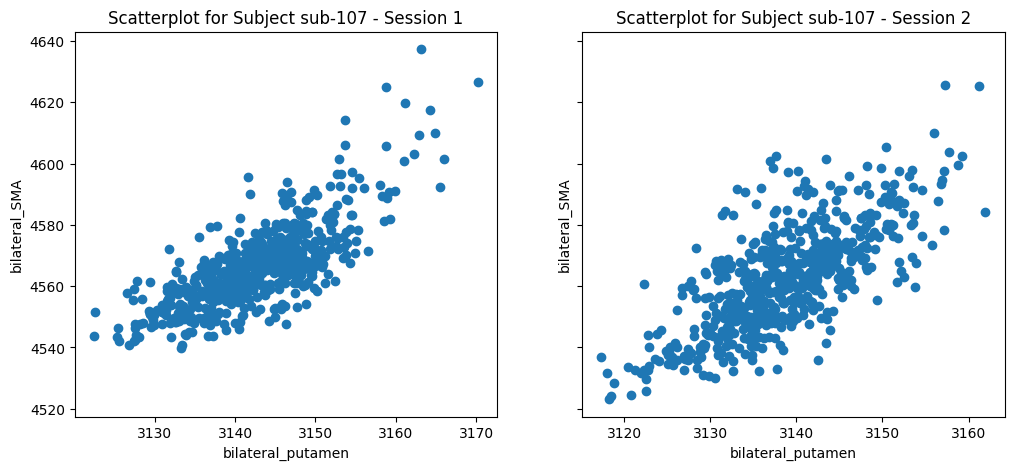

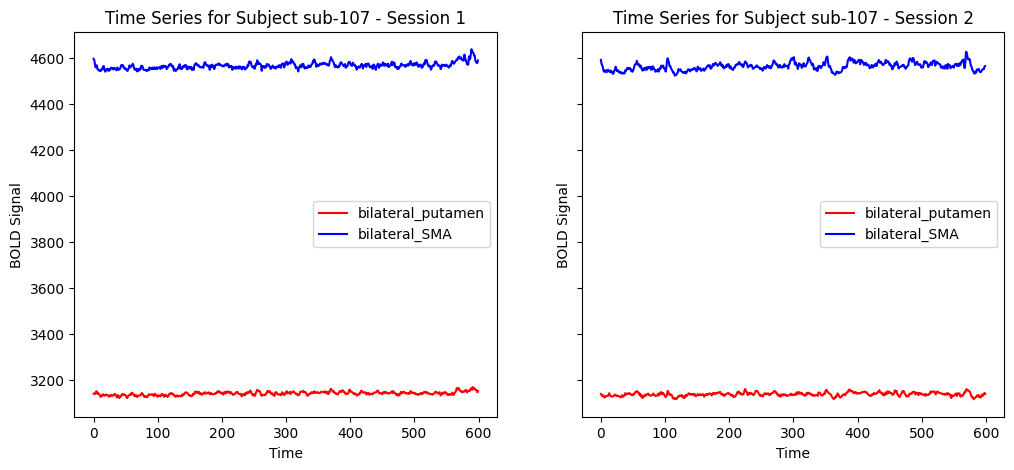

Analyzing subject 108
>> Subject 108: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.7226114424951863, p=5.719107763987132e-98, z-score=0.9130887204784255
 - session 2: r=0.8619466175709287, p=1.4857520948496053e-178, z-score=1.3008686742342102


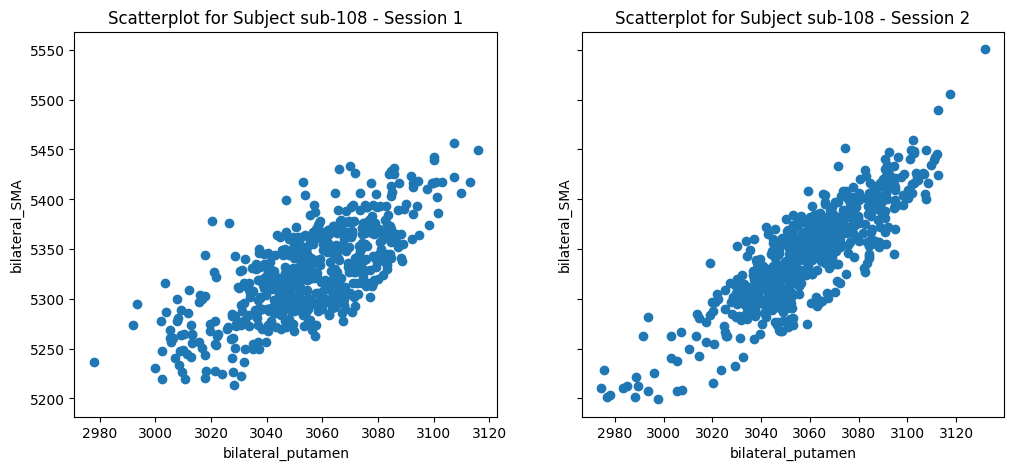

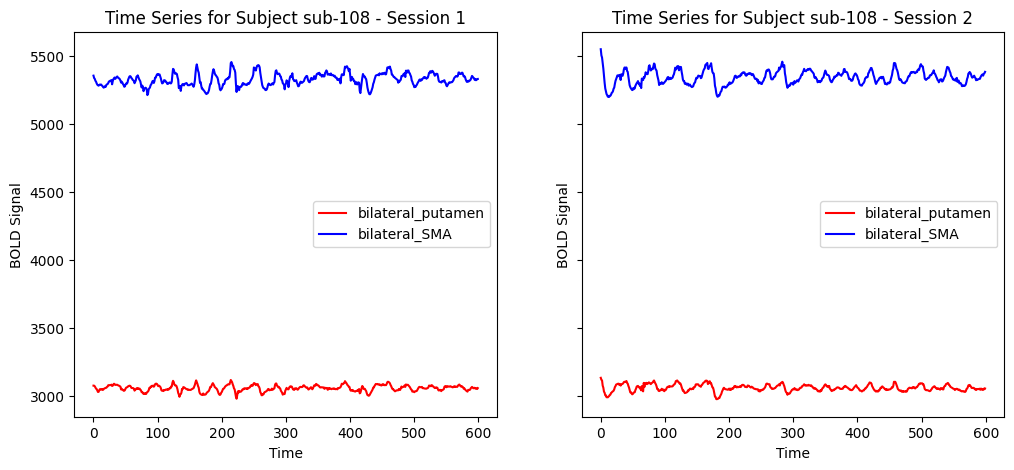

Analyzing subject 109
>> Subject 109: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.6603698533398623, p=2.0174380986954993e-76, z-score=0.7934692190845585
 - session 2: r=0.574640322470662, p=5.104157267900493e-54, z-score=0.6544235237056674


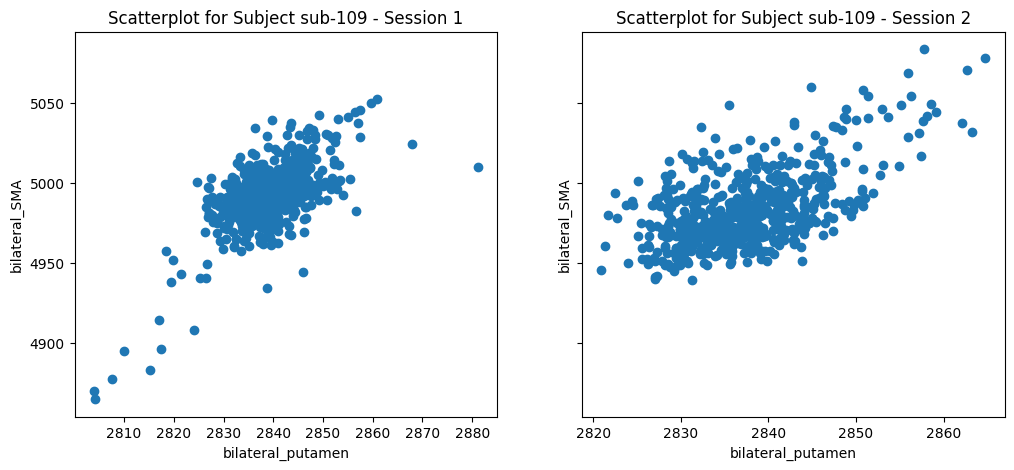

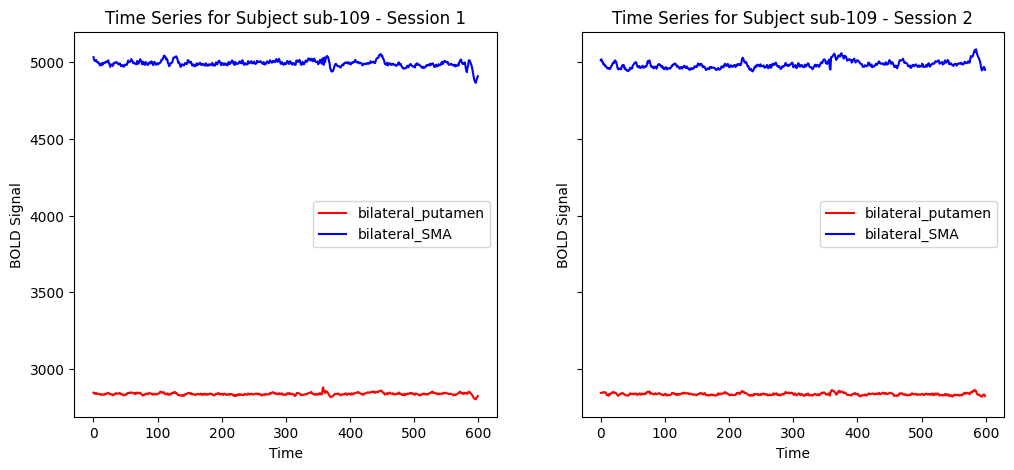

Analyzing subject 110
>> Subject 110: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.7781122113989458, p=7.137935688767184e-123, z-score=1.0405678638857587
 - session 2: r=0.8404277632179844, p=3.0448339176689263e-161, z-score=1.2226282943548177


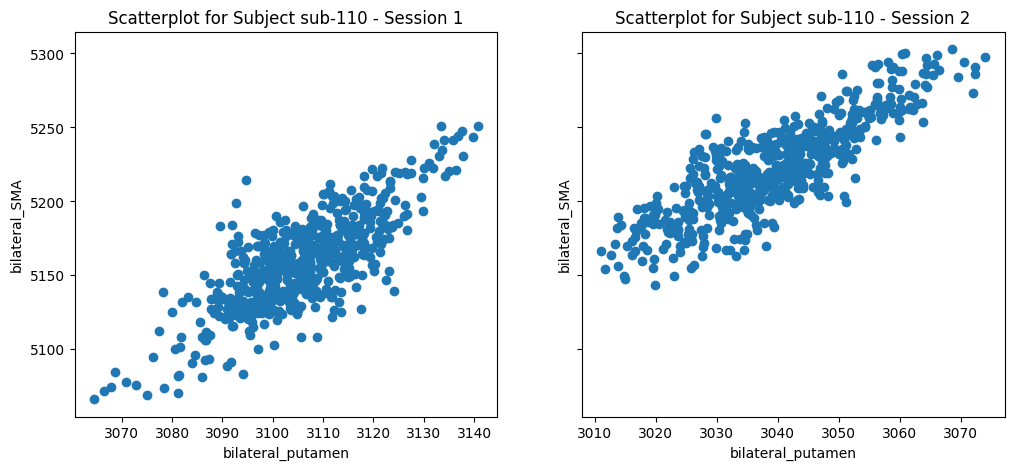

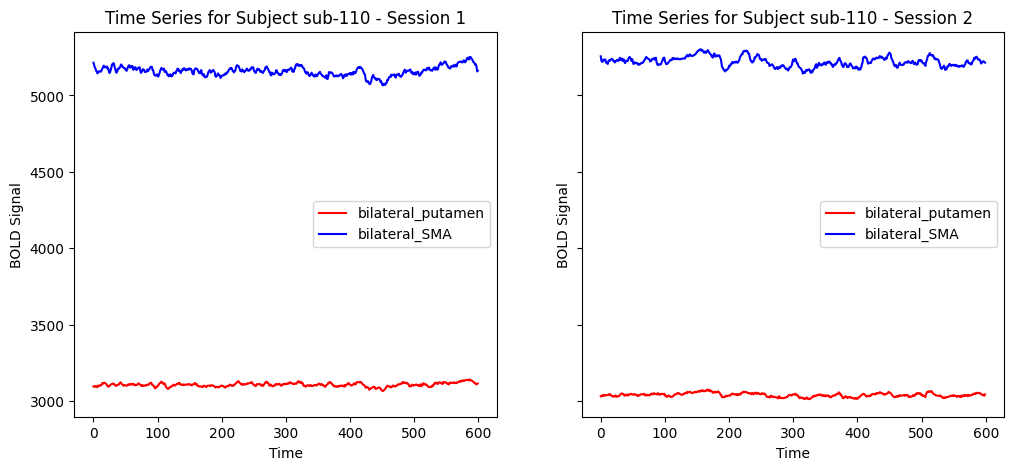

Analyzing subject 112
>> Subject 112: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.5121441656130552, p=1.9930987609602811e-41, z-score=0.5656319794762122
 - session 2: r=0.3733277777981031, p=2.796000550784159e-21, z-score=0.39228423802112716


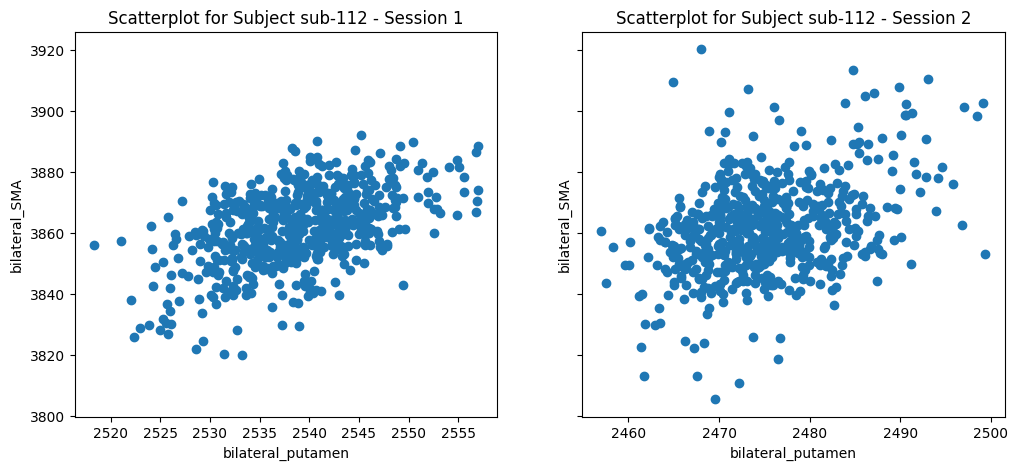

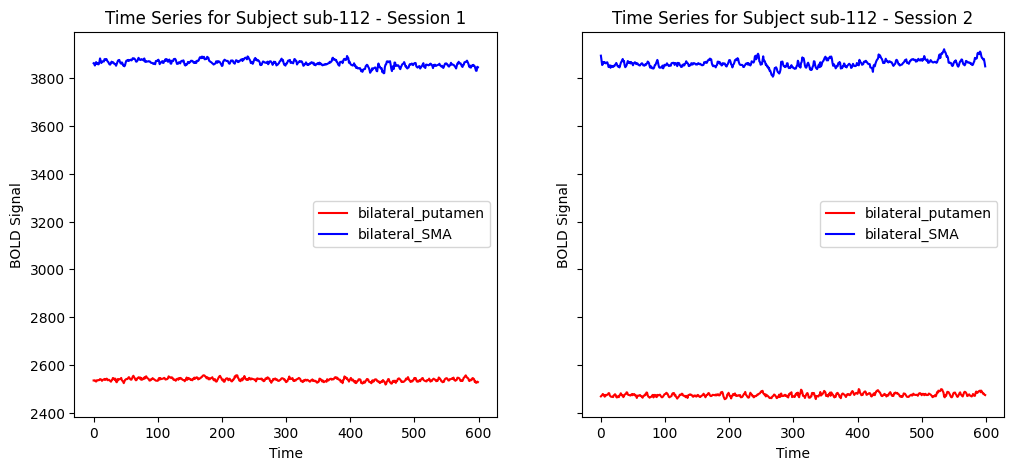

Analyzing subject 113
>> Subject 113: correlation between bilateral_putamen and bilateral_SMA:
 - session 1: r=0.716627700489322, p=1.2035137853174e-95, z-score=0.9006777134715171
 - session 2: r=0.4048179574669247, p=4.5837531685817005e-25, z-score=0.4293978465728175


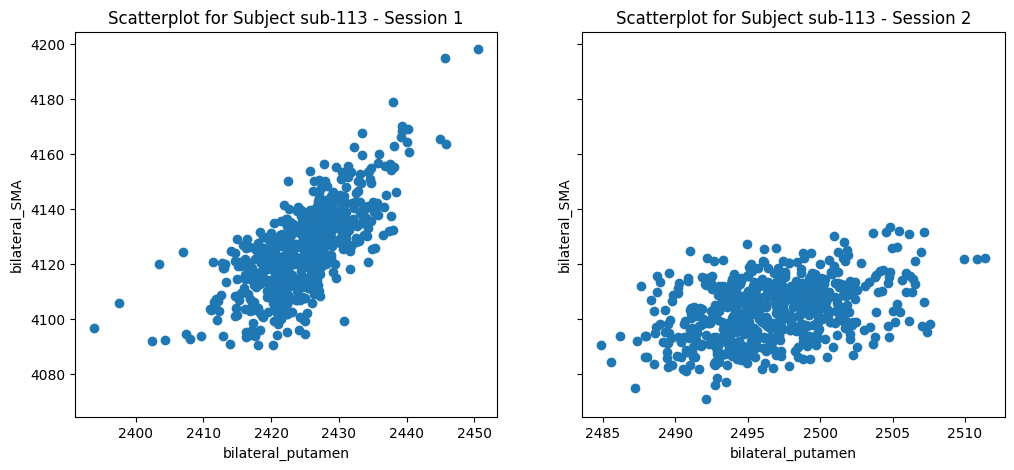

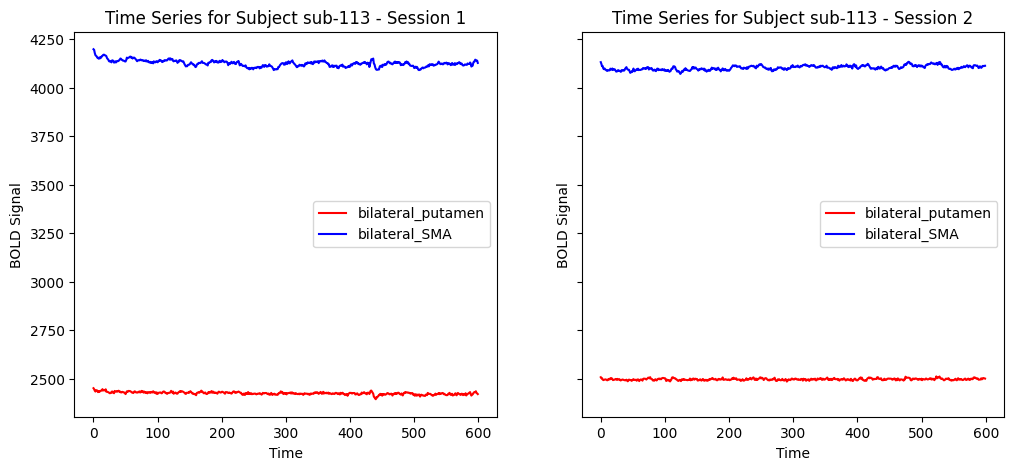

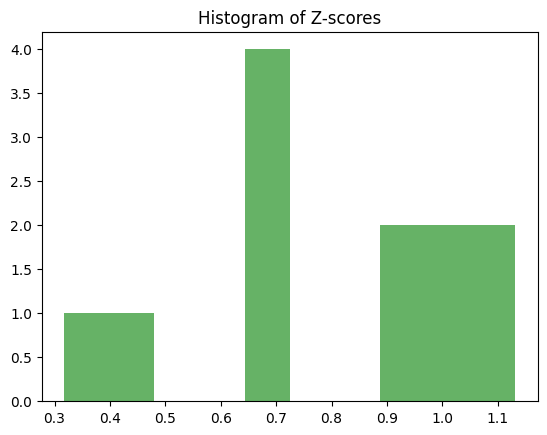

,subID,corr,p_val,z_score
0,101,0.757563,2.653474e-104,0.992165
1,102,0.741587,5.008728e-98,0.955407
2,103,0.749259,2.032436e-90,0.980225
3,104,0.577875,2.939473e-44,0.662829
4,105,0.307226,7.070946e-14,0.317528
5,106,0.598154,6.025224e-42,0.700953
6,107,0.745932,3.219834e-98,0.965816
7,108,0.792279,2.859554e-98,1.106979
8,109,0.617505,2.552079e-54,0.723946
9,110,0.809270,3.568968e-123,1.131598


,subID,bilateral_putamen_bilateral_SMA
0,101,0.992165
1,102,0.955407
2,103,0.980225
3,104,0.662829
4,105,0.317528
5,106,0.700953
6,107,0.965816
7,108,1.106979
8,109,0.723946
9,110,1.131598


In [16]:
# get sub dirs:
IDCH_sub_dirs = [x for x in os.listdir() if 'sub-' in x]
# sort the sub dirs:
IDCH_sub_dirs.sort()

# List to collect data for DataFrame
per_region_data = {}

# Loop over the subject directories in the root directory
for region_pair in connectivity_regions:
    print(f"Analyzing connectivity between {region_pair[0]} and {region_pair[1]}")
    region_df = []
    for subject_dir in IDCH_sub_dirs:
        sub_ID = subject_dir.split('-')[1]
        print(f"Analyzing subject {sub_ID}")

        # Get the data for both regions:
        reg1_ses1_dir = os.path.join(subject_dir, f'sub-{sub_ID}_IDCH_ses-1_{region_pair[0]}_time_series.txt')
        reg1_ses2_dir = os.path.join(subject_dir, f'sub-{sub_ID}_IDCH_ses-2_{region_pair[0]}_time_series.txt')
        reg2_ses1_dir = os.path.join(subject_dir, f'sub-{sub_ID}_IDCH_ses-1_{region_pair[1]}_time_series.txt')
        reg2_ses2_dir = os.path.join(subject_dir, f'sub-{sub_ID}_IDCH_ses-2_{region_pair[1]}_time_series.txt')

        reg1_ses1_ts_data = np.loadtxt(reg1_ses1_dir)
        reg1_ses2_ts_data = np.loadtxt(reg1_ses2_dir)
        reg2_ses1_ts_data = np.loadtxt(reg2_ses1_dir)
        reg2_ses2_ts_data = np.loadtxt(reg2_ses2_dir)

        # Calculate the Pearson correlation between the time series
        correlation_ses1, p_val_ses_1 = pearsonr(reg1_ses1_ts_data, reg2_ses1_ts_data)
        z_score_ses1 = 0.5 * np.log((1 + correlation_ses1) / (1 - correlation_ses1))
        correlation_ses2, p_val_ses_2 = pearsonr(reg1_ses2_ts_data, reg2_ses2_ts_data)
        z_score_ses2 = 0.5 * np.log((1 + correlation_ses2) / (1 - correlation_ses2))

        # Print correlation for the subject:
        print(f">> Subject {sub_ID}: correlation between {region_pair[0]} and {region_pair[1]}:\n - session 1: r={correlation_ses1}, p={p_val_ses_1}, z-score={z_score_ses1}\n - session 2: r={correlation_ses2}, p={p_val_ses_2}, z-score={z_score_ses2}")

        # Scatterplot
        fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
        axs[0].scatter(reg1_ses1_ts_data, reg2_ses1_ts_data)
        axs[0].set_title(f'Scatterplot for Subject {subject_dir} - Session 1')
        axs[0].set_xlabel(region_pair[0])
        axs[0].set_ylabel(region_pair[1])
        axs[1].scatter(reg1_ses2_ts_data, reg2_ses2_ts_data)
        axs[1].set_title(f'Scatterplot for Subject {subject_dir} - Session 2')
        axs[1].set_xlabel(region_pair[0])
        axs[1].set_ylabel(region_pair[1])
        plt.show()

        # Line Plot for the Time-Series Data
        fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
        axs[0].plot(reg1_ses1_ts_data, color='red', label=region_pair[0])
        axs[0].plot(reg2_ses1_ts_data, color='blue', label=region_pair[1])
        axs[0].set_title(f'Time Series for Subject {subject_dir} - Session 1')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('BOLD Signal')
        axs[0].legend()
        axs[1].plot(reg1_ses2_ts_data, color='red', label=region_pair[0])
        axs[1].plot(reg2_ses2_ts_data, color='blue', label=region_pair[1])
        axs[1].set_title(f'Time Series for Subject {subject_dir} - Session 2')
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('BOLD Signal')
        axs[1].legend()
        plt.show()

        #Append the data to list (with means)
        region_df.append({"subID": sub_ID, "corr": np.mean([correlation_ses1, correlation_ses2]), "p_val": np.mean([p_val_ses_1, p_val_ses_2]), "z_score": np.mean([z_score_ses1, z_score_ses2])})

    # keep data
    region_connectivity_df = pd.DataFrame(region_df)
    per_region_data[region_pair[0] + "_" + region_pair[1]] = region_connectivity_df

    # save region_connectivity_df to csv
    region_connectivity_df.to_csv(f'{connectiviity_data_dir}/{region_pair[0]}_{region_pair[1]}_connectivity.csv', index=False)

    # Plot the histogram of the Z-scores
    plt.hist(region_connectivity_df.z_score, alpha=0.6, color='g')
    plt.title("Histogram of Z-scores")
    plt.show()

    display(region_connectivity_df)


# create a data frame that has only the connectivity score (z-score) for each region pair (and the subject ID):\
connectivity_df = pd.DataFrame(columns=['subID'])
for key in per_region_data.keys():
    connectivity_score = per_region_data[key][['subID', 'z_score']]
    connectivity_score = connectivity_score.rename(columns={'z_score': key})
    connectivity_df = pd.merge(connectivity_df, connectivity_score, on='subID', how='outer')
# save the connectivity_df to csv
connectivity_df.to_csv(f'{connectiviity_data_dir}/all_connectivity_scores.csv', index=False)
display(connectivity_df)